#### 서울 열린 데이터 광장
- 서울시 자치구 년도별 CCTV 설치 현황(https://data.seoul.go.kr/dataList/OA-2734/C/1/datasetView.do)
- 서울시 5대 범죄 발생 현황(https://data.seoul.go.kr/dataList/316/S/2/datasetView.do)

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

sns.set_theme()
sns.set(rc={"figure.figsize":(10,5)})

plt.rcParams["font.family"]="Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

##### 1. cctv 설치현황

In [183]:
# cctv 데이터 로드
cctv = pd.read_csv("./data/서울시 자치구 년도별 CCTV 설치 현황.csv", encoding="cp949", thousands=",", skiprows=[1])
cctv

,구분,총계,2013년 이전\n설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,...,Unnamed: 16374,Unnamed: 16375,Unnamed: 16376,Unnamed: 16377,Unnamed: 16378,Unnamed: 16379,Unnamed: 16380,Unnamed: 16381,Unnamed: 16382,Unnamed: 16383
0,종로구,1980,36,540,107,161,131,158,152,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,중 구,2584,130,87,77,236,240,372,386,155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,용산구,2847,44,50,68,83,295,491,115,322,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,성동구,4047,58,99,110,366,279,945,459,647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,광진구,3480,507,82,84,64,21,465,443,709,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,동대문구,2759,1,4,12,107,802,711,201,218,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,중랑구,4193,224,331,104,145,153,170,215,1074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,성북구,4842,137,170,229,322,594,811,867,714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,강북구,3321,0,21,16,68,210,4,375,963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,도봉구,2247,103,2,79,72,103,117,200,202,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
cctv.columns

Index(['구분', '총계', '2013년 이전\n설치된 CCTV', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년',
       ...
       'Unnamed: 16374', 'Unnamed: 16375', 'Unnamed: 16376', 'Unnamed: 16377',
       'Unnamed: 16378', 'Unnamed: 16379', 'Unnamed: 16380', 'Unnamed: 16381',
       'Unnamed: 16382', 'Unnamed: 16383'],
      dtype='object', length=16384)

In [185]:
# 데이터 전처리
# 필요한 컬럼만 복사해서 데이터프레임 생성
cctv = cctv[['구분', '총계', '2013년 이전\n설치된 CCTV', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년', '2020년', '2021년', '2022년']]

In [186]:
cctv.head(1)

,구분,총계,2013년 이전\n설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
0,종로구,1980,36,540,107,161,131,158,152,69,250,85,291


In [187]:
# 컬럼명 변경
# 구분 => 구 별, 총계 => cctv 총계, 2013년 이전\n설치된 CCTV => 2013년 이전
cctv.rename(columns={"구분":"구 별", "총계":"cctv 총계", "2013년 이전\n설치된 CCTV":"2013년 이전"}, inplace=True)

In [188]:
# 2020년 이전 컬럼 생성 = 2013년 이전 + ~~~~ + 2020년
cctv.dtypes

구 별         object
cctv 총계      int64
2013년 이전     int64
2013년        int64
2014년        int64
2015년        int64
2016년        int64
2017년        int64
2018년        int64
2019년        int64
2020년        int64
2021년        int64
2022년        int64
dtype: object

In [189]:
cctv.columns

Index(['구 별', 'cctv 총계', '2013년 이전', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년', '2020년', '2021년', '2022년'],
      dtype='object')

In [190]:
cctv["2020년 이전"] = cctv[cctv.columns.difference(['구 별', 'cctv 총계', '2021년', '2022년'])].sum(axis=1)

In [191]:
cctv = cctv[cctv.columns.difference(['2013년 이전', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년', '2020년'])]
cctv

,2020년 이전,2021년,2022년,cctv 총계,구 별
0,1604,85,291,1980,종로구
1,2044,403,137,2584,중 구
2,2091,422,334,2847,용산구
3,3448,367,232,4047,성동구
4,2547,662,271,3480,광진구
5,2279,221,259,2759,동대문구
6,3392,507,294,4193,중랑구
7,4097,407,338,4842,성북구
8,2226,298,797,3321,강북구
9,1061,600,586,2247,도봉구


In [192]:
# 중 구 ==> 중구
cctv.iloc[1,4] = "중구"

In [193]:
# 데이터 분석
# 1. 구 별 cctv가 가장 적게 설치되어 있는 구 알아보기
cctv[min(cctv['cctv 총계']) == cctv['cctv 총계']]

,2020년 이전,2021년,2022년,cctv 총계,구 별
0,1604,85,291,1980,종로구


In [194]:
# 2. 구 별 cctv가 가장 많이 설치되어 있는 구 알아보기
cctv[max(cctv['cctv 총계']) == cctv['cctv 총계']]

,2020년 이전,2021년,2022년,cctv 총계,구 별
22,6261,514,468,7243,강남구


##### 2. 서울시 거주 인구

In [195]:
seoul = pd.read_excel("./data/주민등록인구(월별)_202212.xlsx",skiprows=[0,1,3],usecols="B,D,G,J")
seoul

,동별(2),소계.1,소계.2,소계.3
0,종로구,152211,141379,10832
1,중구,130785,120437,10348
2,용산구,233284,218650,14634
3,성동구,288234,281000,7234
4,광진구,351252,337416,13836
5,동대문구,353601,336644,16957
6,중랑구,390140,385318,4822
7,성북구,441984,430397,11587
8,강북구,297702,293660,4042
9,도봉구,313989,311694,2295


In [196]:
# 컬럼명 변경
# 구 별, 총인구, 한국인, 외국인
seoul.rename(columns={"동별(2)":"구 별", "소계.1":"총인구", "소계.2":"한국인", "소계.3":"외국인"}, inplace=True)
seoul

,구 별,총인구,한국인,외국인
0,종로구,152211,141379,10832
1,중구,130785,120437,10348
2,용산구,233284,218650,14634
3,성동구,288234,281000,7234
4,광진구,351252,337416,13836
5,동대문구,353601,336644,16957
6,중랑구,390140,385318,4822
7,성북구,441984,430397,11587
8,강북구,297702,293660,4042
9,도봉구,313989,311694,2295


In [197]:
# 외국인 컬럼 기준으로 내림차순
seoul.sort_values("외국인",ascending=False)

,구 별,총인구,한국인,외국인
16,구로구,418418,395315,23103
18,영등포구,398085,375675,22410
5,동대문구,353601,336644,16957
2,용산구,233284,218650,14634
20,관악구,501226,486752,14474
4,광진구,351252,337416,13836
12,서대문구,319554,306337,13217
17,금천구,242818,229642,13176
7,성북구,441984,430397,11587
13,마포구,375585,364638,10947


In [198]:
# cctv 설치 대수 대비 범죄율 파악
# cctv와 seoul 합체
merge = pd.merge(seoul, cctv, on="구 별")
merge.set_index(merge["구 별"], inplace=True)
merge.drop(columns=["구 별"], inplace=True)

In [199]:
# 1인당 cctv 비율 구하기 = cctv 총계 / 총인구 *100
merge["1인당 cctv 비율"] = merge["cctv 총계"] / merge["총인구"] * 100
merge

,총인구,한국인,외국인,2020년 이전,2021년,2022년,cctv 총계,1인당 cctv 비율
구 별,,,,,,,,
종로구,152211,141379,10832,1604,85,291,1980,1.300826
중구,130785,120437,10348,2044,403,137,2584,1.975762
용산구,233284,218650,14634,2091,422,334,2847,1.220401
성동구,288234,281000,7234,3448,367,232,4047,1.404068
광진구,351252,337416,13836,2547,662,271,3480,0.990742
동대문구,353601,336644,16957,2279,221,259,2759,0.780258
중랑구,390140,385318,4822,3392,507,294,4193,1.074742
성북구,441984,430397,11587,4097,407,338,4842,1.095515
강북구,297702,293660,4042,2226,298,797,3321,1.115545


In [200]:
# 상관계수
# 변수 간의 관계의 정도와 방향을 수치로 요약해주는 지표
# 수치는 -1 ~ +1 사이의 값으로 나타남
# 0에 가까울수록 상관관계는 낮아지며, -1이나 +1에 가까울수록 상관관계는 높아짐
# 증감의 방향이 +인 경우에는 정적인 상관관계, -인 경우에는 부정적인 상관관계가 있다고 봄

In [201]:
merge['총인구'].corr(merge["cctv 총계"], method='spearman')

0.4815384615384616

In [202]:
merge['외국인'].corr(merge["cctv 총계"], method='spearman')

0.07461538461538461

#### 시각화

Text(0.5, 1.0, '구 별 1인당 cctv 비율')

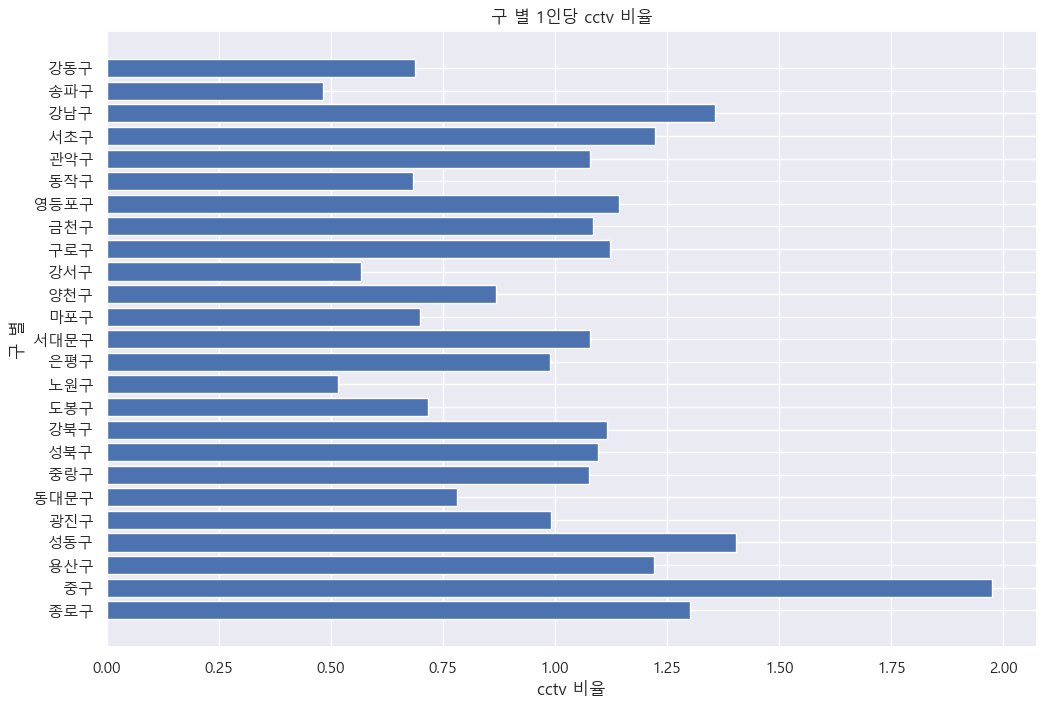

In [203]:
plt.figure(figsize=(12,8))
plt.barh(merge.index, merge["1인당 cctv 비율"])
plt.xlabel("cctv 비율")
plt.ylabel("구 별")
plt.title("구 별 1인당 cctv 비율")

<Axes: ylabel='구 별'>

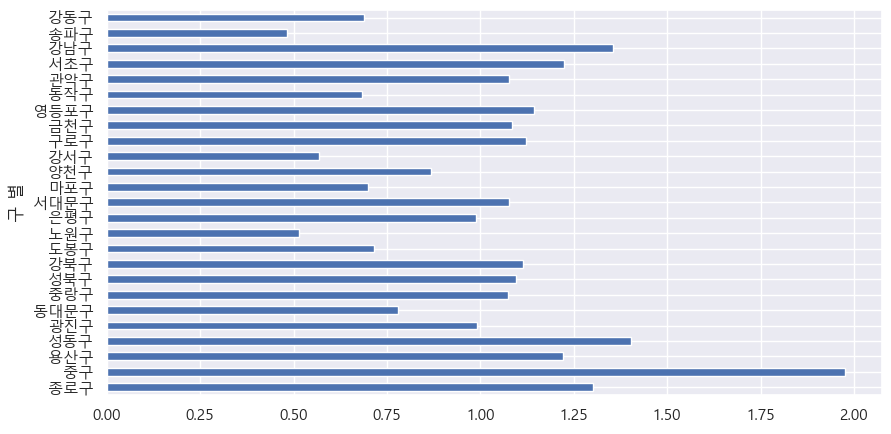

In [204]:
merge['1인당 cctv 비율'].plot.barh()

<Axes: xlabel='1인당 cctv 비율', ylabel='구 별'>

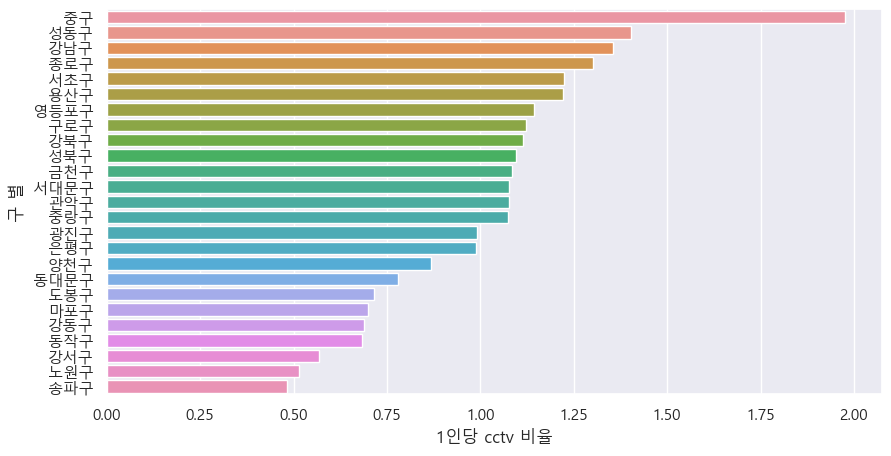

In [205]:
sns.barplot(data=merge,x='1인당 cctv 비율', y=merge.index, order=merge['1인당 cctv 비율'].sort_values(ascending=False).index)

##### 3. 5대 범죄

In [206]:
criminal = pd.read_excel("./data/5대 범죄 발생현황.xlsx",skiprows=[0,1,2,4],usecols="B,C,D")
criminal

,자치구별(2),발생,검거
0,종로구,2712,2755
1,중구,2861,2072
2,용산구,2381,1659
3,성동구,2112,1510
4,광진구,3087,2202
5,동대문구,2959,2113
6,중랑구,3210,2405
7,성북구,2411,1787
8,강북구,2301,1912
9,도봉구,1860,1294


In [207]:
# 컬럼명 변경: 구 별, 범죄건, 검거건
# 인덱스 설정: 구 별
# 검거율 = 검거건 / 범죄건 * 100
criminal.columns = ["구 별","범죄건","검거건"]
criminal.set_index("구 별",inplace=True)
criminal["검거율"] = criminal["검거건"] / criminal["범죄건"] * 100

In [208]:
criminal

,범죄건,검거건,검거율
구 별,,,
종로구,2712,2755,101.585546
중구,2861,2072,72.422230
용산구,2381,1659,69.676606
성동구,2112,1510,71.496212
광진구,3087,2202,71.331390
동대문구,2959,2113,71.409260
중랑구,3210,2405,74.922118
성북구,2411,1787,74.118623
강북구,2301,1912,83.094307


In [209]:
pd.concat([merge,criminal],axis=1)

,총인구,한국인,외국인,2020년 이전,2021년,2022년,cctv 총계,1인당 cctv 비율,범죄건,검거건,검거율
구 별,,,,,,,,,,,
종로구,152211,141379,10832,1604,85,291,1980,1.300826,2712,2755,101.585546
중구,130785,120437,10348,2044,403,137,2584,1.975762,2861,2072,72.422230
용산구,233284,218650,14634,2091,422,334,2847,1.220401,2381,1659,69.676606
성동구,288234,281000,7234,3448,367,232,4047,1.404068,2112,1510,71.496212
광진구,351252,337416,13836,2547,662,271,3480,0.990742,3087,2202,71.331390
동대문구,353601,336644,16957,2279,221,259,2759,0.780258,2959,2113,71.409260
중랑구,390140,385318,4822,3392,507,294,4193,1.074742,3210,2405,74.922118
성북구,441984,430397,11587,4097,407,338,4842,1.095515,2411,1787,74.118623
강북구,297702,293660,4042,2226,298,797,3321,1.115545,2301,1912,83.094307
